In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
import joblib


In [17]:
# Load the cleaned healthcare dataset
data = pd.read_csv('Cleaned_healthcare_dataset.csv')

# Display the first few rows to verify
print(data.head())


        Name  Age  Gender  Medical Condition Date of Admission  Doctor  \
0  Patient_0   58       1                  3        2023-01-01       3   
1  Patient_1   71       0                  1        2023-01-02       7   
2  Patient_2   48       0                  2        2023-01-03       7   
3  Patient_3   34       1                  0        2023-01-04       7   
4  Patient_4   62       0                  3        2023-01-05       4   

   Hospital  Insurance Provider  Billing Amount  Room Number  ...  \
0         3                   1       10.668620          229  ...   
1         0                   4        9.981405          431  ...   
2         0                   0       10.139826          277  ...   
3         3                   0       10.146779          372  ...   
4         3                   0       10.469040          390  ...   

  Blood Type_4  Blood Type_5  Blood Type_6  Blood Type_7  Admission Type_0  \
0            0             0             0             1      

In [18]:
# Define features (X) and target (y)
X = data.drop(columns=['Test Results_0', 'Test Results_1', 'Test Results_2', 'Name', 'Date of Admission', 'Discharge Date'], errors='ignore')
y = data[['Test Results_0', 'Test Results_1', 'Test Results_2']].idxmax(axis=1)
y = y.map({'Test Results_0': 'Normal', 'Test Results_1': 'Abnormal', 'Test Results_2': 'Inconclusive'})


In [19]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(
    max_iter=1000, 
    multi_class='multinomial', 
    solver='lbfgs', 
    random_state=42
)


In [20]:
# Define the cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [21]:
# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}


Columns in X:
['Age', 'Gender', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number', 'Medication', 'Blood Type_0', 'Blood Type_1', 'Blood Type_2', 'Blood Type_3', 'Blood Type_4', 'Blood Type_5', 'Blood Type_6', 'Blood Type_7', 'Admission Type_0', 'Admission Type_1', 'Admission Type_2']
'Blood Type' column not found. Removing it from categorical_features if present.

Cross-Validation Results:
Accuracy - Mean: 0.9065, Std: 0.0019
Precision_macro - Mean: 0.7499, Std: 0.0072
Recall_macro - Mean: 0.6959, Std: 0.0015
F1_macro - Mean: 0.7029, Std: 0.0020

Detailed Cross-Validation Scores:
   Accuracy  Precision    Recall  F1 Score
0  0.904118   0.744043  0.698300  0.705817
1  0.909804   0.762767  0.695691  0.702911
2  0.907353   0.752739  0.695818  0.703032
3  0.905980   0.744455  0.693491  0.699611
4  0.905490   0.745620  0.696169  0.703156


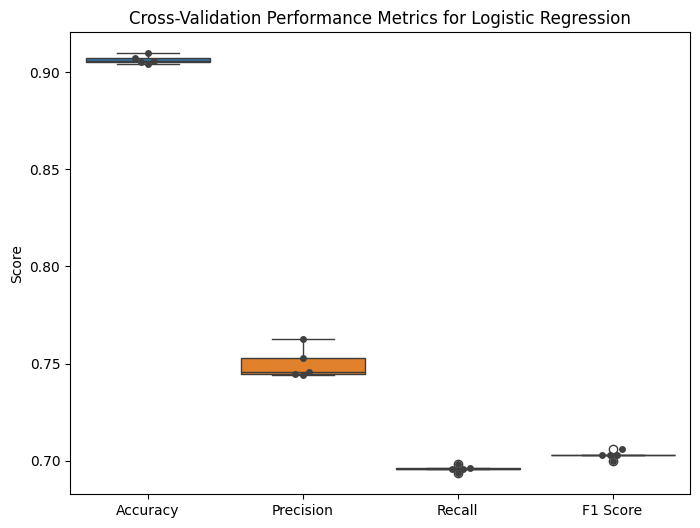

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
import joblib
import warnings



# 1. Load the cleaned healthcare dataset
data = pd.read_csv('Cleaned_healthcare_dataset.csv')

# 2. Define features (X) and target (y)
X = data.drop(columns=['Test Results_0', 'Test Results_1', 'Test Results_2', 
                       'Name', 'Date of Admission', 'Discharge Date'], errors='ignore')
y = data[['Test Results_0', 'Test Results_1', 'Test Results_2']].idxmax(axis=1)
y = y.map({'Test Results_0': 'Normal', 'Test Results_1': 'Abnormal', 'Test Results_2': 'Inconclusive'})

# 3. Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 4. Identify categorical and numerical features
categorical_features = ['Gender', 'Blood Type', 'Medical Condition', 'Medication', 
                        'Admission Type', 'Doctor', 'Hospital', 'Insurance Provider']
numerical_features = [col for col in X.columns if col not in categorical_features]

# 5. Verify if 'Blood Type' exists and adjust if necessary
print("Columns in X:")
print(X.columns.tolist())

if 'Blood Type' in X.columns:
    print("'Blood Type' column found.")
else:
    print("'Blood Type' column not found. Removing it from categorical_features if present.")
    categorical_features = [feature for feature in categorical_features if feature != 'Blood Type']

# 6. Encode categorical features
for feature in categorical_features:
    if feature in X.columns:
        if X[feature].dtype == 'object' or X[feature].dtype.name == 'category':
            X[feature] = label_encoder.fit_transform(X[feature].astype(str))
    else:
        print(f"Warning: {feature} column not found in X.")
        # Optionally, add the missing column with a default value
        X[feature] = 0  # or another appropriate default

# 7. Standardize numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# 8. Define the Logistic Regression model without 'multi_class'
logistic_model = LogisticRegression(
    max_iter=2000,  # Increased from 1000 to 2000
    solver='lbfgs',  # You can experiment with 'saga' or 'liblinear'
    random_state=42,
    multi_class='auto'  # Default is 'auto', which uses 'multinomial' for multiclass
)

# Alternatively, switch to a different solver like 'saga' if convergence issues persist
# logistic_model = LogisticRegression(
#     max_iter=2000,
#     solver='saga',
#     random_state=42,
#     multi_class='auto'
# )

# 9. Set Up Cross-Validation Strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 10. Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

# 11. Perform cross-validation
cv_results = cross_validate(
    logistic_model, 
    X, 
    y, 
    cv=cv_strategy, 
    scoring=scoring, 
    return_train_score=False
)

# 12. Display cross-validation results
print("\nCross-Validation Results:")
for metric in scoring.keys():
    mean = cv_results[f'test_{metric}'].mean()
    std = cv_results[f'test_{metric}'].std()
    print(f"{metric.capitalize()} - Mean: {mean:.4f}, Std: {std:.4f}")

# 13. Visualize Cross-Validation Results
cv_results_df = pd.DataFrame({
    'Accuracy': cv_results['test_accuracy'],
    'Precision': cv_results['test_precision_macro'],
    'Recall': cv_results['test_recall_macro'],
    'F1 Score': cv_results['test_f1_macro']
})

print("\nDetailed Cross-Validation Scores:")
print(cv_results_df)

# Visualization: Boxplot for F1 Scores
plt.figure(figsize=(8, 6))
sns.boxplot(data=cv_results_df)
sns.swarmplot(data=cv_results_df, color=".25")
plt.title('Cross-Validation Performance Metrics for Logistic Regression')
plt.ylabel('Score')
plt.show()


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
import warnings


# 1. Load the cleaned healthcare dataset
data = pd.read_csv('Cleaned_healthcare_dataset.csv')

# 2. Define features (X) and target (y)
X = data.drop(columns=['Test Results_0', 'Test Results_1', 'Test Results_2', 
                       'Name', 'Date of Admission', 'Discharge Date'], errors='ignore')
y = data[['Test Results_0', 'Test Results_1', 'Test Results_2']].idxmax(axis=1)
y = y.map({'Test Results_0': 'Normal', 'Test Results_1': 'Abnormal', 'Test Results_2': 'Inconclusive'})

# 3. Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 4. Identify categorical and numerical features
categorical_features = ['Gender', 'Blood Type', 'Medical Condition', 'Medication', 
                        'Admission Type', 'Doctor', 'Hospital', 'Insurance Provider']
numerical_features = [col for col in X.columns if col not in categorical_features]

# 5. Verify if 'Blood Type' exists and adjust if necessary
print("Columns in X:")
print(X.columns.tolist())

if 'Blood Type' in X.columns:
    print("'Blood Type' column found.")
else:
    print("'Blood Type' column not found. Removing it from categorical_features if present.")
    categorical_features = [feature for feature in categorical_features if feature != 'Blood Type']

# 6. Encode categorical features
for feature in categorical_features:
    if feature in X.columns:
        if X[feature].dtype == 'object' or X[feature].dtype.name == 'category':
            X[feature] = label_encoder.fit_transform(X[feature].astype(str))
    else:
        print(f"Warning: {feature} column not found in X.")
        # Optionally, add the missing column with a default value
        X[feature] = 0  # or another appropriate default

# 7. Standardize numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# 8. Define the models with default hyperparameters
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# 9. Define the cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 10. Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

def evaluate_model(model, X, y, cv, scoring):
    """
    Performs cross-validation on a given model and returns the mean and std of specified metrics.
    
    Parameters:
    - model: The machine learning model to evaluate.
    - X: Features.
    - y: Target variable.
    - cv: Cross-validation strategy.
    - scoring: Dictionary of scoring metrics.
    
    Returns:
    - Dictionary containing mean and std of each metric.
    """
    cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=False)
    
    results = {}
    for metric in scoring.keys():
        metric_mean = cv_results[f'test_{metric}'].mean()
        metric_std = cv_results[f'test_{metric}'].std()
        results[f"{metric.capitalize()} Mean"] = metric_mean
        results[f"{metric.capitalize()} Std"] = metric_std
    return results

# Initialize a list to store all results
results_list = []

# Iterate over each model and perform cross-validation
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    results = evaluate_model(model, X, y_encoded, cv_strategy, scoring)
    results['Model'] = model_name
    results_list.append(results)

# Convert the list of results into a DataFrame using pd.concat
cv_results_df = pd.DataFrame(results_list)

# Reorder columns for better readability
cols = ['Model'] + [col for col in cv_results_df.columns if col != 'Model']
cv_results_df = cv_results_df[cols]

# Display the results
print("\nCross-Validation Results:")
print(cv_results_df)

# Visualization: Bar Plot for Each Metric Across Models
melted_cv = cv_results_df.melt(id_vars="Model", 
                               value_vars=["Accuracy Mean", "Precision Mean", "Recall Mean", "F1 Score Mean"],
                               var_name="Metric", value_name="Score")

plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='Score', hue='Metric', data=melted_cv)
plt.title('Cross-Validation Performance Metrics Across Models')
plt.ylabel('Score')
plt.xlabel('Model')
plt.ylim(0.6, 1.0)  # Adjust based on your metrics
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Columns in X:
['Age', 'Gender', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number', 'Medication', 'Blood Type_0', 'Blood Type_1', 'Blood Type_2', 'Blood Type_3', 'Blood Type_4', 'Blood Type_5', 'Blood Type_6', 'Blood Type_7', 'Admission Type_0', 'Admission Type_1', 'Admission Type_2']
'Blood Type' column not found. Removing it from categorical_features if present.
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating Support Vector Machine...
Evaluating Decision Tree...
Evaluating K-Nearest Neighbors...

Cross-Validation Results:
                    Model  Accuracy Mean  Accuracy Std  Precision_macro Mean  \
0           Random Forest       1.000000      0.000000              1.000000   
1       Gradient Boosting       1.000000      0.000000              1.000000   
2  Support Vector Machine       0.946922      0.001603              0.974500   
3           Decision Tree       1.000000      0.000000              1.000000   
4

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['Precision Mean', 'Recall Mean', 'F1 Score Mean']"


Decision Tree Cross-Validation Results:
           Model  Accuracy Mean  Accuracy Std  Precision Mean  Precision Std  \
0  Decision Tree            1.0           0.0             1.0            0.0   

   Recall Mean  Recall Std  F1 Score Mean  F1 Score Std  
0          1.0         0.0            1.0           0.0  


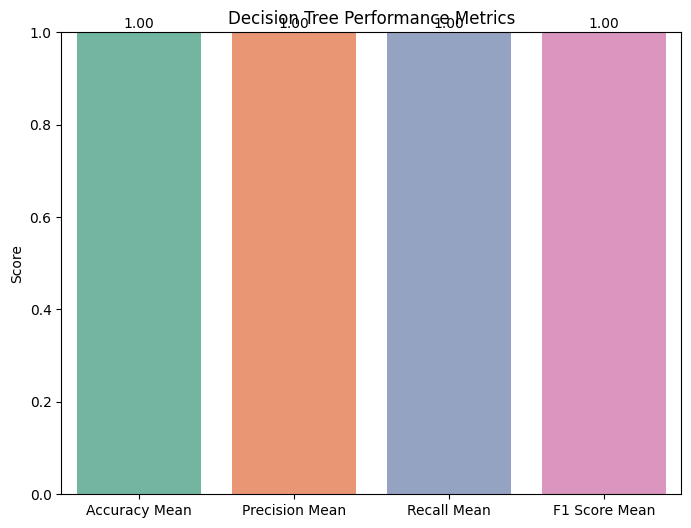

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer

# 1. Define the Decision Tree model with desired hyperparameters
decision_tree = DecisionTreeClassifier(
    max_depth=None,          # Maximum depth of the tree
    min_samples_split=2,     # Minimum number of samples required to split an internal node
    random_state=42
)

# 2. Define cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 3. Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

# 4. Perform cross-validation and collect results
cv_results_dt = cross_validate(
    decision_tree, 
    X, 
    y_encoded, 
    cv=cv_strategy, 
    scoring=scoring, 
    return_train_score=False
)

# 5. Compile results into a dictionary
results_dt = {
    "Model": "Decision Tree",
    "Accuracy Mean": cv_results_dt['test_accuracy'].mean(),
    "Accuracy Std": cv_results_dt['test_accuracy'].std(),
    "Precision Mean": cv_results_dt['test_precision_macro'].mean(),
    "Precision Std": cv_results_dt['test_precision_macro'].std(),
    "Recall Mean": cv_results_dt['test_recall_macro'].mean(),
    "Recall Std": cv_results_dt['test_recall_macro'].std(),
    "F1 Score Mean": cv_results_dt['test_f1_macro'].mean(),
    "F1 Score Std": cv_results_dt['test_f1_macro'].std()
}

# 6. Create a DataFrame from the results
df_dt = pd.DataFrame([results_dt])

# 7. Display the results
print("\nDecision Tree Cross-Validation Results:")
print(df_dt)

# 8. Visualization (Optional)
metrics = ['Accuracy Mean', 'Precision Mean', 'Recall Mean', 'F1 Score Mean']
scores = [results_dt['Accuracy Mean'], results_dt['Precision Mean'], 
          results_dt['Recall Mean'], results_dt['F1 Score Mean']]

plt.figure(figsize=(8,6))
sns.barplot(x=metrics, y=scores, palette='Set2')
plt.title('Decision Tree Performance Metrics')
plt.ylabel('Score')
plt.ylim(0,1)
for index, value in enumerate(scores):
    plt.text(index, value + 0.01, f"{value:.2f}", ha='center')
plt.show()


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
import warnings

# 

# 1. Load the cleaned healthcare dataset
data = pd.read_csv('Cleaned_healthcare_dataset.csv')

# 2. Define features (X) and target (y)
X = data.drop(columns=['Test Results_0', 'Test Results_1', 'Test Results_2', 
                       'Name', 'Date of Admission', 'Discharge Date'], errors='ignore')
y = data[['Test Results_0', 'Test Results_1', 'Test Results_2']].idxmax(axis=1)
y = y.map({'Test Results_0': 'Normal', 'Test Results_1': 'Abnormal', 'Test Results_2': 'Inconclusive'})

# 3. Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 4. Identify categorical and numerical features
categorical_features = ['Gender', 'Medical Condition', 'Medication', 
                        'Doctor', 'Hospital', 'Insurance Provider']
numerical_features = [col for col in X.columns if col not in categorical_features]

# 5. Check for duplicates and remove them
initial_shape = X.shape
data_combined = pd.concat([X, pd.Series(y_encoded, name='Target')], axis=1)
data_combined = data_combined.drop_duplicates()
X = data_combined.drop(columns=['Target'])
y_encoded = data_combined['Target']
final_shape = X.shape
print(f"Removed {initial_shape[0] - final_shape[0]} duplicate records.")

# 6. Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 7. Create the Random Forest pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 8. Define the cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 9. Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

# 10. Perform cross-validation
print("Evaluating Random Forest...")
cv_results_rf = cross_validate(
    rf_pipeline, 
    X, 
    y_encoded, 
    cv=cv_strategy, 
    scoring=scoring, 
    return_train_score=False
)

# 11. Aggregate the results
rf_results = {
    'Model': 'Random Forest',
    'Accuracy Mean': cv_results_rf['test_accuracy'].mean(),
    'Accuracy Std': cv_results_rf['test_accuracy'].std(),
    'Precision_macro Mean': cv_results_rf['test_precision_macro'].mean(),
    'Precision_macro Std': cv_results_rf['test_precision_macro'].std(),
    'Recall_macro Mean': cv_results_rf['test_recall_macro'].mean(),
    'Recall_macro Std': cv_results_rf['test_recall_macro'].std(),
    'F1_macro Mean': cv_results_rf['test_f1_macro'].mean(),
    'F1_macro Std': cv_results_rf['test_f1_macro'].std()
}

# 12. Display the results
rf_results_df = pd.DataFrame([rf_results])
print("\nRandom Forest Cross-Validation Results:")
print(rf_results_df)


Removed 0 duplicate records.
Evaluating Random Forest...

Random Forest Cross-Validation Results:
           Model  Accuracy Mean  Accuracy Std  Precision_macro Mean  \
0  Random Forest            1.0           0.0                   1.0   

   Precision_macro Std  Recall_macro Mean  Recall_macro Std  F1_macro Mean  \
0                  0.0                1.0               0.0            1.0   

   F1_macro Std  
0           0.0  


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
import warnings


# 1. Load the cleaned healthcare dataset
data = pd.read_csv('Cleaned_healthcare_dataset.csv')

# 2. Define features (X) and target (y)
X = data.drop(columns=['Test Results_0', 'Test Results_1', 'Test Results_2', 
                       'Name', 'Date of Admission', 'Discharge Date'], errors='ignore')
y = data[['Test Results_0', 'Test Results_1', 'Test Results_2']].idxmax(axis=1)
y = y.map({'Test Results_0': 'Normal', 'Test Results_1': 'Abnormal', 'Test Results_2': 'Inconclusive'})

# 3. Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 4. Identify categorical and numerical features
categorical_features = ['Gender', 'Medical Condition', 'Medication', 
                        'Doctor', 'Hospital', 'Insurance Provider']
numerical_features = [col for col in X.columns if col not in categorical_features]

# 5. Check for duplicates and remove them
initial_shape = X.shape
data_combined = pd.concat([X, pd.Series(y_encoded, name='Target')], axis=1)
data_combined = data_combined.drop_duplicates()
X = data_combined.drop(columns=['Target'])
y_encoded = data_combined['Target']
final_shape = X.shape
print(f"Removed {initial_shape[0] - final_shape[0]} duplicate records.")

# 6. Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 7. Create the Decision Tree pipeline
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# 8. Define the cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 9. Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

# 10. Perform cross-validation
print("Evaluating Decision Tree...")
cv_results_dt = cross_validate(
    dt_pipeline, 
    X, 
    y_encoded, 
    cv=cv_strategy, 
    scoring=scoring, 
    return_train_score=False
)

# 11. Aggregate the results
dt_results = {
    'Model': 'Decision Tree',
    'Accuracy Mean': cv_results_dt['test_accuracy'].mean(),
    'Accuracy Std': cv_results_dt['test_accuracy'].std(),
    'Precision_macro Mean': cv_results_dt['test_precision_macro'].mean(),
    'Precision_macro Std': cv_results_dt['test_precision_macro'].std(),
    'Recall_macro Mean': cv_results_dt['test_recall_macro'].mean(),
    'Recall_macro Std': cv_results_dt['test_recall_macro'].std(),
    'F1_macro Mean': cv_results_dt['test_f1_macro'].mean(),
    'F1_macro Std': cv_results_dt['test_f1_macro'].std()
}

# 12. Display the results
dt_results_df = pd.DataFrame([dt_results])
print("\nDecision Tree Cross-Validation Results:")
print(dt_results_df)


Removed 0 duplicate records.
Evaluating Decision Tree...

Decision Tree Cross-Validation Results:
           Model  Accuracy Mean  Accuracy Std  Precision_macro Mean  \
0  Decision Tree            1.0           0.0                   1.0   

   Precision_macro Std  Recall_macro Mean  Recall_macro Std  F1_macro Mean  \
0                  0.0                1.0               0.0            1.0   

   F1_macro Std  
0           0.0  


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
import numpy as np

# Define the model
rf_model = RandomForestClassifier(n_estimators=5, max_depth=5, class_weight='balanced', random_state=42)

# Define stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_results_rf = cross_validate(rf_model, X, y, cv=cv, scoring=['precision_macro', 'recall_macro', 'f1_macro'])

# Display results
print("Precision Macro Scores Across Folds:", cv_results_rf['test_precision_macro'])
print("Precision Macro Std:", np.std(cv_results_rf['test_precision_macro']))


Precision Macro Scores Across Folds: [0.72818853 0.73796626 0.76793623 0.78172242 0.74057908]
Precision Macro Std: 0.020145234841492672
